In [1]:
import pickle
all_wrong_preds = pickle.load(open('all_wrong_preds.p','rb'))

In [169]:
all_wrong_preds['WikiNEuRal']['ned.testb']

[(0, ['B-MISC'], ['O']),
 (6,
  ['B-ORG',
   'O',
   'B-ORG',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O'],
  ['O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O']),
 (7,
  ['O', 'B-ORG', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'],
  ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']),
 (8, ['B-MISC'], ['O']),
 (9,
  ['O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'B-MISC',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O'],
  ['O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O']),
 (10, ['B-MISC', 'I-MISC'], ['O', 'O']),
 (11,
  ['B-ORG', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'],
  ['O', 'O', 'O', 'O', 'O', 'O', 

In [ ]:
# it's sentence-level

In [2]:
wrong_preds_indices = {
    model:
        {
            test: [item[0] for item in all_wrong_preds[model][test]]
                        for test in all_wrong_preds[model].keys()

        }
    for model in all_wrong_preds.keys()
}

In [3]:
def is_simplified(pred, label): # we set all 'MISC' and 'ORG' to 'O' but WikiNEuRal predicts them correctly
    return pred.split('-')[-1] in ['ORG','MISC'] and label == 'O'

In [4]:
def get_wrong_token_indices(pred_item):
    ind, preds, labels = pred_item
    return tuple([(ind, i) for i in range(len(preds)) 
                  if preds[i] != labels[i] and not is_simplified(preds[i],labels[i])])

In [5]:
#todo
wrong_preds_tokens = {
    model:
        {
            test: [get_wrong_token_indices(item) for item in all_wrong_preds[model][test]]
                        for test in all_wrong_preds[model].keys()

        }
    for model in all_wrong_preds.keys()
}

In [6]:
wrong_preds_tokens

{'GysBERT': {'test_NHA.txt': [((0, 7),
    (0, 28),
    (0, 29),
    (0, 31),
    (0, 32),
    (0, 40),
    (0, 87)),
   ((2, 37), (2, 60), (2, 66), (2, 74), (2, 75), (2, 102), (2, 131), (2, 167)),
   ((4, 20), (4, 31)),
   ((5, 56), (5, 156), (5, 159), (5, 164), (5, 226), (5, 228), (5, 229)),
   ((7, 44),
    (7, 45),
    (7, 61),
    (7, 62),
    (7, 112),
    (7, 121),
    (7, 127),
    (7, 148),
    (7, 150),
    (7, 195)),
   ((8, 124), (8, 125), (8, 128), (8, 151)),
   ((9, 35), (9, 122), (9, 154), (9, 160)),
   ((10, 23), (10, 24), (10, 48)),
   ((14, 94),
    (14, 95),
    (14, 96),
    (14, 97),
    (14, 106),
    (14, 198),
    (14, 203),
    (14, 231),
    (14, 240)),
   ((15, 29),),
   ((16, 13), (16, 59)),
   ((17, 29), (17, 114)),
   ((20, 0), (20, 162)),
   ((21, 59),
    (21, 104),
    (21, 105),
    (21, 120),
    (21, 142),
    (21, 167),
    (21, 169),
    (21, 170),
    (21, 171),
    (21, 226),
    (21, 227),
    (21, 243),
    (21, 248)),
   ((22, 47), (22, 111), 

In [7]:
from itertools import combinations


all_models = set(wrong_preds_indices.keys())
def get_hard_sentence_indices(test_name):
    res = []
    combos = [combinations(wrong_preds_indices.keys(),i+1) for i in range(4)]
    for i, combo in enumerate(combos):
        for models in combo: # these models make the same mistakes that others don't
            wrong_models = set(models)
            correct_models = all_models - wrong_models
            
#             print(wrong_models, correct_models)
            mistakes_by_wrong_models = set.intersection(*[
                set(wrong_preds_indices[model][test_name])
                for model in wrong_models
            ])
            
            try:
                mistakes_by_correct_models = set.union(*[
                    set(wrong_preds_indices[model][test_name])
                    for model in correct_models
                ])
            except: # empty set
                mistakes_by_correct_models = set()
            
            res.append({'mistaken_models': wrong_models,
                       'sentence_indices': set.difference(mistakes_by_wrong_models, 
                                                         mistakes_by_correct_models
                                                         )
                       })
    return res

In [8]:
all_hard_sentence_indices = {test:get_hard_sentence_indices(test)
    for test in all_wrong_preds['GysBERT'].keys()
                            }

In [9]:
# Plot the diagrams

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
from venn import venn


In [19]:
tests_by_century = {'21': ['ned.testb'],
                   '19': ['test_RHC.txt','test_NHA.txt'],
                   '17-18': ['test_VOC.txt','test_SA.txt']}

In [20]:
test_names = {'test_VOC.txt':'VOC',
              'test_SA.txt': 'SA',
              'test_NHA.txt':'NHA',
              'test_RHC.txt':'RHC',
              'ned.testb': 'CoNLL\'02'
}

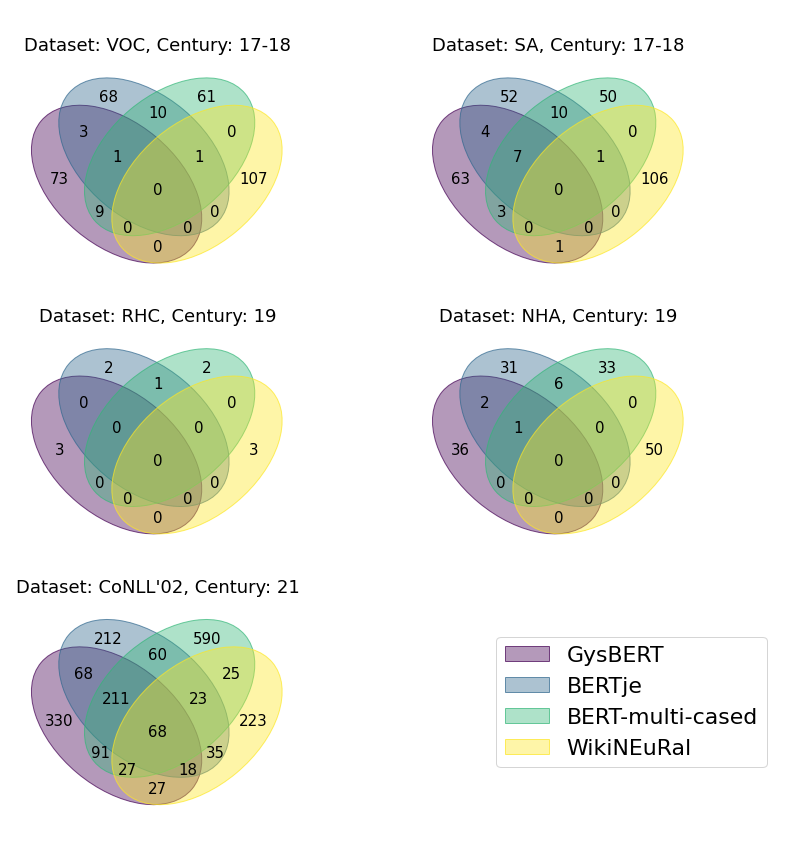

In [21]:
fig, axs = plt.subplots(3, 2, figsize=(12, 12)) 
cmap = sns.color_palette("Spectral_r")
# test = 'ned.testb'
for i, century in enumerate(list(tests_by_century.keys())[::-1]):
    for j, test in enumerate(tests_by_century[century]):
        data = {
            model: set(wrong_preds_tokens[model][test])
                for model in all_wrong_preds.keys()
        }
        venn(data,ax=axs[i][j],legend_loc=None,
            fontsize=15) 
        axs[i][j].set_title('Dataset: {}, Century: {}'.format(test_names[test],century),
                           fontsize=18,
                            y=0.9, pad=-14)
        
        # ax.legend(dataset_labels, loc=legend_loc, prop={"size": fontsize})

axs[-1][-1].axis('off')

fig.legend(all_wrong_preds.keys(), 
#            loc='best',
           loc='lower right',bbox_to_anchor = (0.9, 0.09), 
           fontsize=22)
plt.tight_layout(h_pad=-3,w_pad=-3)
# plt.savefig('plots/mistakes_per_dataset.pdf')
plt.show()

In [24]:
data = {
            model: set(wrong_preds_tokens[model]['ned.testb'])
                for model in all_wrong_preds.keys()
        }

data['GysBERT'].intersection(data['BERTje']).intersection(data['WikiNEuRal']).intersection(data['BERT-multi-cased'])

{((93, 7), (93, 8), (93, 9)),
 ((137, 1),),
 ((351, 1),),
 ((441, 0),),
 ((723, 1),),
 ((830, 1),),
 ((931, 1),),
 ((982, 0),),
 ((1046, 9),),
 ((1083, 1),),
 ((1122, 2),),
 ((1199, 1),),
 ((1314, 1),),
 ((1345, 1),),
 ((1383, 1),),
 ((1404, 21),),
 ((1499, 8),),
 ((1550, 1),),
 ((1585, 4), (1585, 5)),
 ((1667, 3),),
 ((1762, 1),),
 ((1797, 5),),
 ((2090, 1),),
 ((2193, 34),),
 ((2197, 36),),
 ((2310, 1),),
 ((2425, 1),),
 ((2552, 1),),
 ((2589, 1),),
 ((2612, 0),),
 ((2641, 5),),
 ((2652, 4),),
 ((2688, 0),),
 ((2726, 0),),
 ((2808, 1),),
 ((2902, 20),),
 ((3076, 25),),
 ((3123, 1),),
 ((3293, 1),),
 ((3334, 21),),
 ((3547, 1),),
 ((3598, 1),),
 ((3677, 1),),
 ((3863, 1),),
 ((3891, 1),),
 ((3943, 1),),
 ((3995, 8),),
 ((4121, 12),),
 ((4202, 6),),
 ((4204, 18),),
 ((4234, 8),),
 ((4326, 0), (4326, 1)),
 ((4356, 7),),
 ((4391, 0), (4391, 1)),
 ((4410, 1),),
 ((4498, 40),),
 ((4562, 1),),
 ((4699, 13),),
 ((4762, 1),),
 ((4782, 1),),
 ((4802, 3),),
 ((4805, 1),),
 ((4844, 1),),
 ((4846

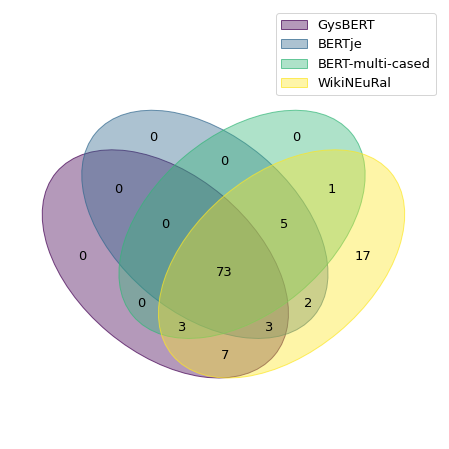

In [54]:
test = 'test_VOC.txt'

data = {
    model: set(wrong_preds_indices[model][test])
        for model in all_wrong_preds.keys()
}
venn(data)

In [51]:
data

{'GysBERT': [(0,
   ['B-LOC',
    'O',
    'O',
    'O',
    'B-LOC',
    'O',
    'B-LOC',
    'O',
    'O',
    'O',
    'O',
    'O',
    'O',
    'O',
    'O',
    'O',
    'O',
    'O',
    'O',
    'O',
    'O',
    'O',
    'O',
    'O',
    'O',
    'O',
    'O',
    'O',
    'O',
    'O',
    'O',
    'O',
    'O',
    'O',
    'O',
    'O',
    'O',
    'O',
    'O',
    'O',
    'O',
    'O',
    'O',
    'O',
    'O',
    'O',
    'O',
    'O',
    'O',
    'O',
    'O',
    'O',
    'O',
    'O',
    'O',
    'O',
    'O',
    'O',
    'B-LOC',
    'O',
    'B-LOC',
    'O',
    'O',
    'O',
    'O',
    'O',
    'O',
    'O',
    'O',
    'O',
    'O',
    'O',
    'O',
    'O',
    'O',
    'O',
    'O',
    'O',
    'O',
    'O',
    'O',
    'O',
    'O',
    'O',
    'O',
    'O',
    'O',
    'O',
    'B-PER',
    'I-PER',
    'O',
    'O',
    'O',
    'O',
    'O',
    'O',
    'O',
    'O',
    'O',
    'O',
    'O',
    'O',
    'O',
    'O',
    'O',
    'O',
 

In [50]:
for model in all_wrong_preds.keys():
    print(model,type(model))

GysBERT <class 'str'>
BERTje <class 'str'>
BERT-multi-cased <class 'str'>
WikiNEuRal <class 'str'>


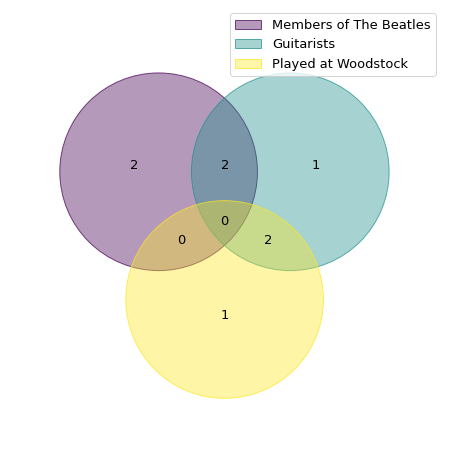

In [47]:
from venn import venn
%matplotlib inline

musicians = {
    "Members of The Beatles": {"Paul McCartney", "John Lennon", "George Harrison", "Ringo Starr"},
    "Guitarists": {"John Lennon", "George Harrison", "Jimi Hendrix", "Eric Clapton", "Carlos Santana"},
    "Played at Woodstock": {"Jimi Hendrix", "Carlos Santana", "Keith Moon"}
}for model in all_wrong_preds.keys()
venn(musicians)